In [1]:
# Initial imports

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


### Data preparation

In [2]:
# Read csv file
data_df = pd.read_csv('resources/crypto_data.csv')

# Drop of `Unnamed: 0` column
data_df = data_df.drop(columns='Unnamed: 0')
data_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# Filter for cryptos that are being traded
crypto_df = data_df[data_df['IsTrading'] == True]


In [4]:
# Drop the 'IsTrading' column 
crypto_df = crypto_df.drop(columns='IsTrading')

In [5]:
# Check and drop nulls
crypto_df.isnull().sum()

CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [6]:
crypto_df.dropna(inplace=True)
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
# Filter for cryptocurrencies that are greater than zero
crypto_df = crypto_df[crypto_df['TotalCoinsMined'] > 0]
crypto_df


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
# Drop `CoinName` column
crypto_df = crypto_df.drop(columns='CoinName')
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [9]:
# Convert categorical data to numerical using `pd.get_dummies`

crypto_con = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
crypto_con

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Standardize the dataset 
crypto_scaled = StandardScaler().fit_transform(crypto_con[['TotalCoinsMined', 'TotalCoinSupply']])
crypto_scaled

array([[-0.11710817, -0.1528703 ],
       [-0.09396955, -0.145009  ],
       [ 0.52494561,  4.48942416],
       ...,
       [-0.09561336, -0.13217937],
       [-0.11694817, -0.15255998],
       [-0.11710536, -0.15285552]])

In [11]:
# Create a new dataframe with scaled data
crypto_scaled_df = pd.DataFrame(crypto_scaled, columns=crypto_con.columns[0:2])
crypto_scaled_df.head()

,TotalCoinsMined,TotalCoinSupply
0,-0.117108,-0.152870
1,-0.093970,-0.145009
2,0.524946,4.489424
3,-0.116715,-0.152560
4,-0.114747,-0.152870


In [12]:
# Combine all datasets together
crypto_new_df = crypto_con.copy()
crypto_new_df['TotalCoinsMined'] = crypto_scaled_df['TotalCoinsMined']
crypto_new_df['TotalCoinSupply'] = crypto_scaled_df['TotalCoinSupply']
crypto_new_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.117108,-0.152870,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.524946,4.489424,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,-0.115726,-0.151629,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,-0.116731,-0.152870,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-0.114622,-0.149767,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,NaN,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,NaN,NaN,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,NaN,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,NaN,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
crypto_new_df.dropna(inplace=True)
crypto_new_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.117108,-0.152870,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.524946,4.489424,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,-0.115726,-0.151629,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,-0.116731,-0.152870,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-0.114622,-0.149767,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,-0.117035,-0.152829,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
522,-0.095180,-0.138093,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
523,-0.114915,-0.151393,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
525,21.591857,14.476243,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [14]:
# Save cleaned data 
file_path = Path('resources/crypto_data_cleaned.csv')
crypto_new_df.to_csv(file_path, index=False)

### Dimensionality Reduction

In [16]:
# Apply PCA for dimentionality reduction, preserve 90% of the varience
pca = PCA(n_components=0.9)
crypto_pca = pca.fit_transform(crypto_new_df)


In [17]:
crypto_pca.shape

(205, 5)

In [18]:
pca.explained_variance_ratio_.sum()

0.9070454922969063

In [21]:
# Create PCA dataframe
crypto_pca_df = pd.DataFrame(data=crypto_pca,
                            columns=['principal component 1',
                                      'principal component 2',
                                      'principal component 3',
                                      'principal component 4',
                                      'principal component 5'])
crypto_pca_df

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-0.241511,0.615145,0.806801,-0.228579,0.047497
1,2.936626,0.627979,1.035342,-0.406365,-0.137990
2,-0.221011,0.939729,-0.096842,-0.212008,0.058997
3,-0.266698,-0.478116,-0.748021,-0.371819,0.531672
4,-0.255333,-0.511726,-0.473934,-0.080186,-0.105339
...,...,...,...,...,...
200,-0.253363,0.396449,-0.330251,0.998168,0.302115
201,-0.194521,0.862953,-0.074250,-0.232015,0.021616
202,-0.250301,0.329491,-0.336699,1.141571,0.325741
203,25.953906,0.117016,0.077380,0.066335,0.097530


In [22]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.71230101, 0.08172273, 0.05317656, 0.03469429, 0.02515091])

In [87]:
# Run t-SNE 
tsne = TSNE(learning_rate=30)
tsne_features = tsne.fit_transform(crypto_pca_df)
tsne_features.shape

(205, 2)

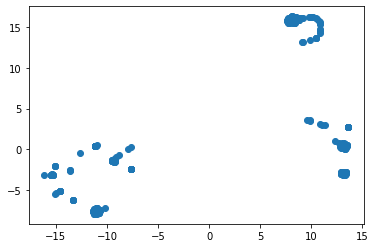

In [88]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

### Cluster Analysis with k-Means

In [82]:


inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values

for i in k:
  km = KMeans(n_clusters=i, random_state=0)
  km.fit(crypto_pca_df)
  inertia.append(km.inertia_)

# Create the Elbow curve using hvPlot
elbow_data = {'k': k, 'inertia': inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df


,k,inertia
0,1,1152.711306
1,2,475.770205
2,3,193.162723
3,4,143.525968
4,5,107.483293
5,6,78.804974
6,7,59.469552
7,8,49.956605
8,9,40.720500
9,10,34.477211


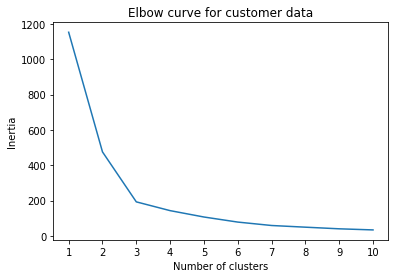

In [83]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [84]:
# Initialize the k-means model, using k=3
model = KMeans(n_clusters=3, random_state=0)
model.fit(tsne_features)

# Predict clusters
preds = model.predict(tsne_features)
preds

array([0, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2,
       1, 2, 2, 0, 1, 1, 2, 0, 2, 0, 2, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0, 0,
       2, 1, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 0, 2, 1, 0, 2, 0, 0, 0, 2,
       1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 2, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0,
       1, 0, 2, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0,
       0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1], dtype=int32)

In [85]:
crypto_new_df['class'] = model.labels_

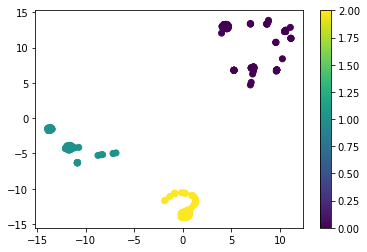

In [86]:
plt.scatter(tsne_features[:, 0], tsne_features[:,1], c = model.labels_ )
plt.colorbar()
plt.show()
